In [2]:
from google.colab import files
uploaded = files.upload()


Saving hacktest.csv to hacktest.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving hacktrain.csv to hacktrain.csv


In [4]:
import os
os.listdir()


['.config', 'hacktest.csv', 'hacktrain.csv', 'sample_data']

In [5]:
import pandas as pd

train = pd.read_csv('hacktrain.csv')
test = pd.read_csv('hacktest.csv')


In [6]:
train.head()
train.shape
train.info()
train['class'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8000 non-null   int64  
 1   ID          8000 non-null   int64  
 2   class       8000 non-null   object 
 3   20150720_N  7440 non-null   float64
 4   20150602_N  6800 non-null   float64
 5   20150517_N  7200 non-null   float64
 6   20150501_N  7040 non-null   float64
 7   20150415_N  7520 non-null   float64
 8   20150330_N  6880 non-null   float64
 9   20150314_N  7280 non-null   float64
 10  20150226_N  6640 non-null   float64
 11  20150210_N  7360 non-null   float64
 12  20150125_N  6960 non-null   float64
 13  20150109_N  7120 non-null   float64
 14  20141117_N  6720 non-null   float64
 15  20141101_N  7600 non-null   float64
 16  20141016_N  6560 non-null   float64
 17  20140930_N  7200 non-null   float64
 18  20140813_N  7440 non-null   float64
 19  20140626_N  6400 non-null  

,count
class,
forest,6159
farm,841
impervious,669
grass,196
water,105
orchard,30


In [8]:

ndvi_cols = [col for col in train.columns if col not in ['ID', 'class']]


In [9]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

train[ndvi_cols] = imputer.fit_transform(train[ndvi_cols])
test[ndvi_cols] = imputer.transform(test[ndvi_cols])


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['class_encoded'] = le.fit_transform(train['class'])


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Features = NDVI columns
X = train[ndvi_cols]

# Target = Encoded class labels
y = train['class_encoded']

# Split into training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Fit the model
model.fit(X_train, y_train)

# Validate it
y_pred = model.predict(X_val)

# Print report
print(classification_report(y_val, y_pred, target_names=le.classes_))
print("Validation Accuracy:", accuracy_score(y_val, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

        farm       0.82      0.87      0.85       161
      forest       0.99      1.00      0.99      1231
       grass       0.86      0.70      0.77        43
  impervious       0.88      0.83      0.85       141
     orchard       0.17      0.17      0.17         6
       water       0.76      0.72      0.74        18

    accuracy                           0.95      1600
   macro avg       0.75      0.71      0.73      1600
weighted avg       0.95      0.95      0.95      1600

Validation Accuracy: 0.95375


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
# Predict encoded labels
test_preds_encoded = model.predict(test[ndvi_cols])

# Convert encoded labels back to original classes
test_preds = le.inverse_transform(test_preds_encoded)


In [13]:
submission = pd.DataFrame({
    'ID': test['ID'],
    'class': test_preds
})

submission.to_csv('submission.csv', index=False)


In [14]:
from google.colab import files
files.download('submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

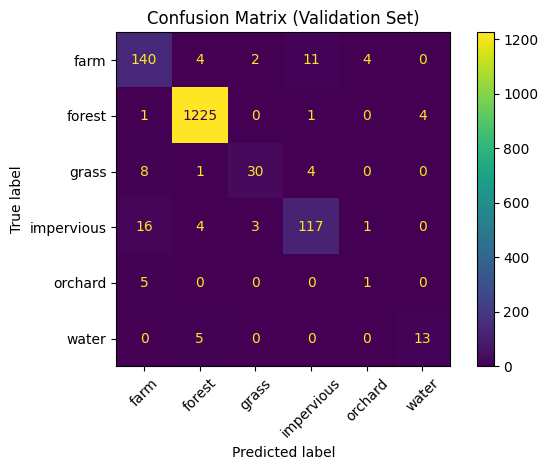

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='viridis', xticks_rotation=45)
plt.title("Confusion Matrix (Validation Set)")
plt.tight_layout()
plt.savefig('conf_matrix.png')  # Use this image in your doc
plt.show()


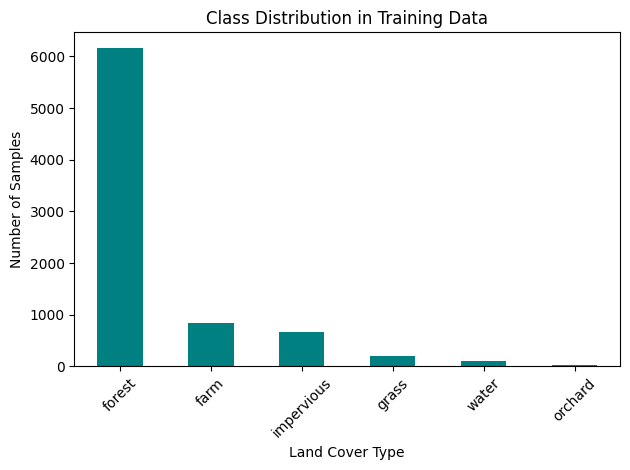

In [16]:
train['class'].value_counts().plot(kind='bar', color='teal')
plt.title("Class Distribution in Training Data")
plt.xlabel("Land Cover Type")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('class_dist.png')
plt.show()
